In [652]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn

# Importación del modelo y análisis descriptivo

In [1000]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [1001]:
# Importamos la data de los 3 csv
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [1002]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1003]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Contamos con 891 registros totales.

__Data Faltante__

* Nos faltan datos de la variable "Age". ¿Es importante esta variable para el modelo?
* Nos falta data de la variable "Cabin". ¿Es importante esta variable para el modelo?
* Nos falta data de la variable Embarked. Dado que la data faltante es poca, podemos eliminar el registro.

__Tipos de data__

* Pclass es una variable que sería en teoría categórica, dado que representa la clase del boleto que el pasajero compró y este dato puede no ser escalar. Procederemos a realizar la transformación de variable escalar a categórica.
* Sex es una variable categórica binaria, por lo que generaremos 1 columna para hombres y 1 columna para mujeres.

__Preguntas conceptuales__
* Cabin se compone de 1 letra seguida a un número de hasta 3 dígitos. ¿Que significa el número? ¿Que significa la letra? Tienen relación con la supervivencia del individuo?

¿Cuales son las variables que más impactarían en el modelo?


# Exploración y transformación de la data

In [1004]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Survived es una variable categórica binaria, y nuestra "y" (OK)
* Pclass es una variable categórica multiclass, por lo que hay que transformarla a dummies. (OK)
* Name no es algo que nos pueda proporcionar mucha información para el modelo (OK)
* Sex es una variable categórica binaria, por lo que hay que transformarla a dummies. (OK)
* Age está bien como float. (OK)
* SibSp está bien como int. (OK)
* Parch está bien como int. (OK)
* Ticket no es algo que nos pueda proporcionar mucha información ¿o si? (OK - si sirve)
* Fare está bien como float (OK)
* Cabin contiene un número y una letra. ¿Que significa el número y la letra? ¿Influyen estos en la supervivencia? (OK)
* Embarked es una variable categórica multiclass, por lo que hay que transformarla a dummies. (OK)

In [1005]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* No se puede ver a primera vista que hayan outliers en las variables PassengerId, Survived, Pclass y age.
* Tenemos que evaluar si hay outliers en SibSp, Parch, Fare (Listo).
* ¿Existen PassagerId duplicados? Si es así hay que removerlos. (Listo)

### Variable SibSp

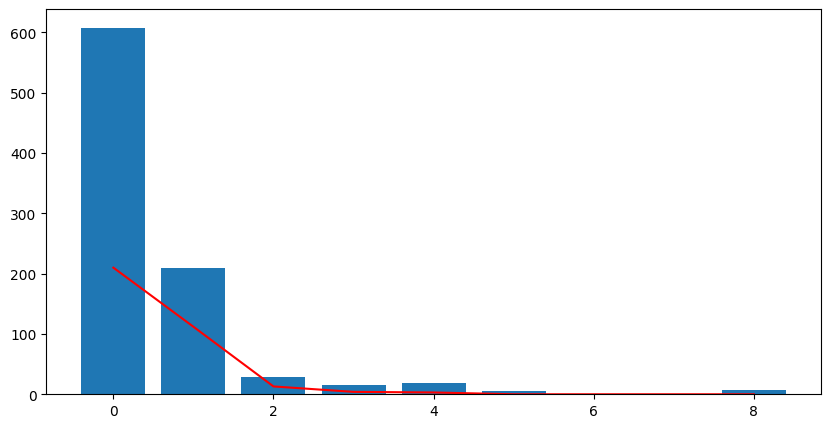

In [1006]:
# Generamos una gráfica para ver la relación entre SibSp y Survived
sibsp_sum = train.groupby("SibSp", as_index=False).sum()
sibsp_count = train.groupby("SibSp", as_index=False).count()

fig = plt.figure(figsize = (10, 5))

plt.bar(sibsp_count["SibSp"], sibsp_count["Survived"])
plt.plot(sibsp_sum["SibSp"], sibsp_sum["Survived"], c="red")

fig.show()

### Variable Parch

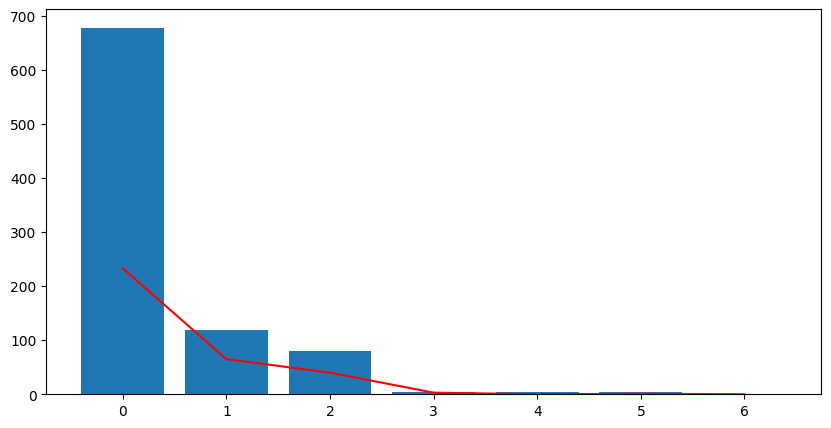

In [1007]:
## Generamos una gráfica para ver la relación entre Parch y Survived
parch_sum = train.groupby("Parch", as_index=False).sum()
parch_count = train.groupby("Parch", as_index=False).count()

fig = plt.figure(figsize = (10, 5))

plt.bar(parch_count["Parch"], parch_count["Survived"])
plt.plot(parch_sum["Parch"], parch_sum["Survived"], c="red")

fig.show()

### Variable Sex

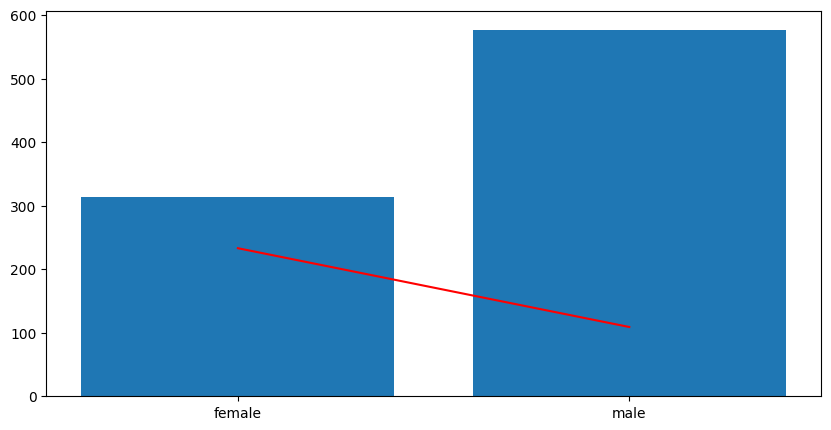

In [1008]:
## Generamos una gráfica para ver la relación entre Sex y Survived
sex_sum = train.groupby("Sex", as_index=False).sum()
sex_count = train.groupby("Sex", as_index=False).count()

fig = plt.figure(figsize = (10, 5))

plt.bar(sex_count["Sex"], sex_count["Survived"])
plt.plot(sex_sum["Sex"], sex_sum["Survived"], c="red")

fig.show()

In [1009]:
# Transformamos la variable Sex del conjunto de entrenamiento a dummies para luego incorporarlas al 
# dataset y eliminar la variable original.
t_train = train

t_train["Sex"] = t_train['Sex'].replace(['female','male'],[0,1])

### Variable PClass

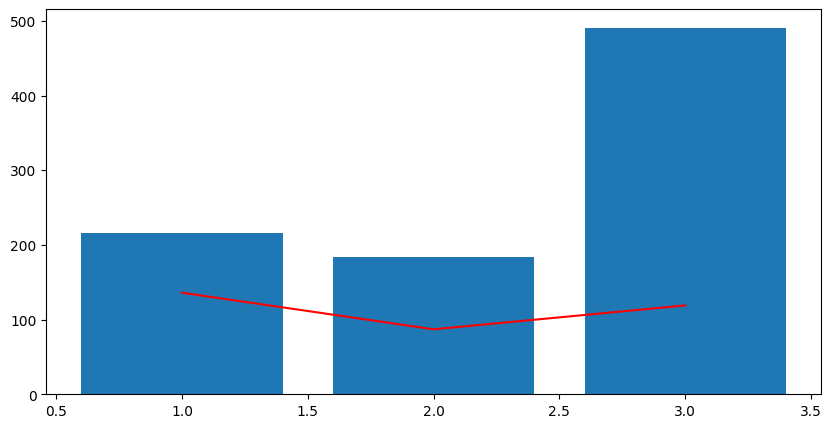

In [1010]:
# Generamos una gráfica para ver la relación entre PClass y Survived
Pclass_sum = train.groupby("Pclass", as_index=False).sum()
Pclass_count = train.groupby("Pclass", as_index=False).count()

fig = plt.figure(figsize = (10, 5))

plt.bar(Pclass_count["Pclass"], Pclass_count["Survived"])
plt.plot(Pclass_sum["Pclass"], Pclass_sum["Survived"], c="red")

fig.show()

Como no podemos desmostrar que la variable Pclass sea una variable escalar, la trataremos como una variable categórica

In [1011]:
# Transformamos la variable Pclass a dummies para incorporarla al dataset como variable categórica
Pclass_dummies = pd.get_dummies(data=train.Pclass).rename(columns={1:"class_1",2:"class_2",3:"class_3"})
t_train = pd.concat([t_train,Pclass_dummies], axis=1)
t_train = t_train.drop(columns="Pclass")

### Variable Embarked

<Axes: xlabel='Embarked', ylabel='count'>

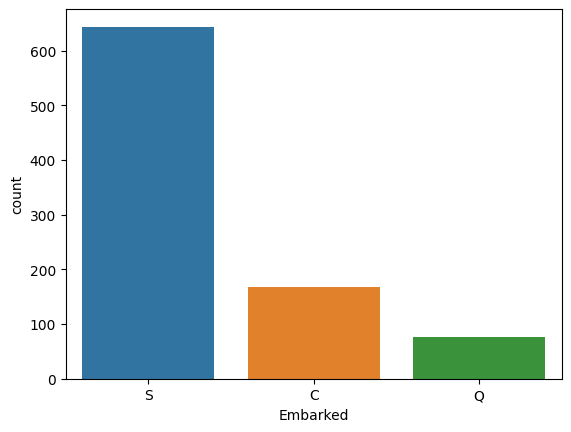

In [1012]:
# Creamos un countplot para entender que componentes tiene la variable Embarked
sns.countplot(data=t_train, x="Embarked")

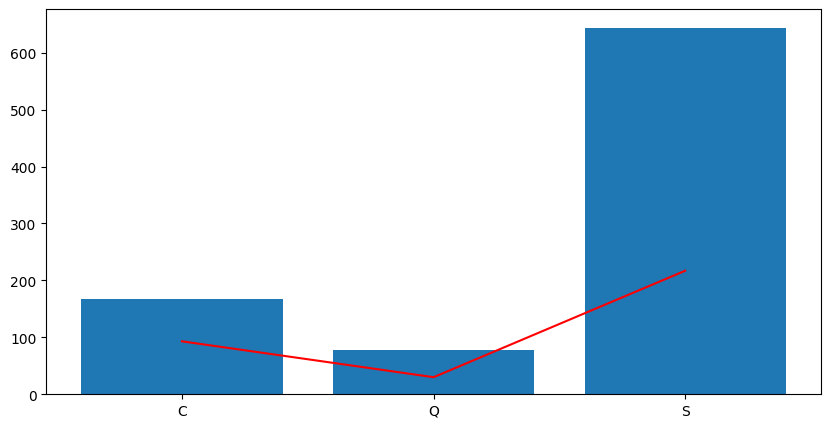

In [1013]:
# Generamos una gráfica para ver la relación entre Embarked y Survived
embarked_sum = t_train.groupby("Embarked", as_index=False).sum()
embarked_count = t_train.groupby("Embarked", as_index=False).count()

fig = plt.figure(figsize = (10, 5))

plt.bar(embarked_count["Embarked"], embarked_count["Survived"])
plt.plot(embarked_sum["Embarked"], embarked_sum["Survived"], c="red")

fig.show()

En cuanto a cantidades, los que embarcaron en "S", son la mayoría, sin embargo no sobrevivió la misma proporción de ellos que de C y Q. Si optaramos por elegir a 1 persona al azar, entre C, Q y S, probablemente saldría S primero.

In [1014]:
# Revisamos si hay algúna relación entre esta variable y Survived.
total_embarked = embarked_count["Survived"][0]+embarked_count["Survived"][1]+embarked_count["Survived"][2]

C = embarked_count["Survived"][0]/total_embarked
Q = embarked_count["Survived"][1]/total_embarked
S = embarked_count["Survived"][2]/total_embarked

Cc = embarked_sum["Survived"][0]
Cq = embarked_sum["Survived"][1]
Cs = embarked_sum["Survived"][2]

total_survived = embarked_sum["Survived"][0] + embarked_sum["Survived"][1] + embarked_sum["Survived"][2]

print(f"Según probabilidad simple, debieron haber sobrevivido {C*total_survived} de C, pero sobrevivieron {Cc}")
print(f"Según probabilidad simple, debieron haber sobrevivido {Q*total_survived} de Q, pero sobrevivieron {Cq}")
print(f"Según probabilidad simple, debieron haber sobrevivido {S*total_survived} de S, pero sobrevivieron {Cs}")

Según probabilidad simple, debieron haber sobrevivido 64.25196850393701 de C, pero sobrevivieron 93
Según probabilidad simple, debieron haber sobrevivido 29.448818897637796 de Q, pero sobrevivieron 30
Según probabilidad simple, debieron haber sobrevivido 246.2992125984252 de S, pero sobrevivieron 217


En este caso, pareciera haber una diferencia de aproximadamente 30 sobrevivientes entre la probabilidad esperada de C y la probabilidad esperada de S, por lo que pueda haber una correlación, más ayá de la proporción de los datos.

Ahora que conocemos un poco más la variable Embarked, la transformaremos en dummies y la incorporaremos al modelo dado que es una variable categórica.

In [1015]:
# Transformamos la variable Embarked a dummies y la ingresamos al dataset.
embarked_dummies = pd.get_dummies(data=train.Embarked)
t_train = pd.concat ([t_train,embarked_dummies], axis=1)
t_train = t_train.drop(columns="Embarked")

### Variable Cabin

In [1016]:
t_train.head(5)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,class_1,class_2,class_3,C,Q,S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


Podemos ver que las cabinas tienen una letra asociada y un número posteriormente. Esto puede significar una separación por niveles dentro del barco y por número de habitación o de camarote. Por lo que optamos por separar la letra del número. Tomaremos también el valor None como un valor Z para incluirlo dentro del modelo y no afectar la cantidad de registros.

In [1017]:
# Rellenamos los t_train None con una categoría Z
t_train["Cabin"] = t_train["Cabin"].fillna("Z")

In [1018]:
# Separamos las letras de los números en Cabin para poder visualizar mejor como influyen en la supervivencia del
# individuo.

import re

t_train["Cabin L"] = None
t_train["Cabin N"] = None

for i in range(len(t_train)):
    
    if t_train["Cabin"][i] != "Z":
        letter = re.split("\d",t_train["Cabin"][i])
        number = re.split("\D",t_train["Cabin"][i])
        
        t_train["Cabin L"][i] = letter[0]
        t_train["Cabin N"][i] = number[1]
        
t_train["Cabin N"] = pd.to_numeric(t_train["Cabin N"])

In [1019]:
t_train["Cabin L"] = t_train["Cabin L"].fillna("Z")
t_train["Cabin N"] = t_train["Cabin N"].fillna(1000)

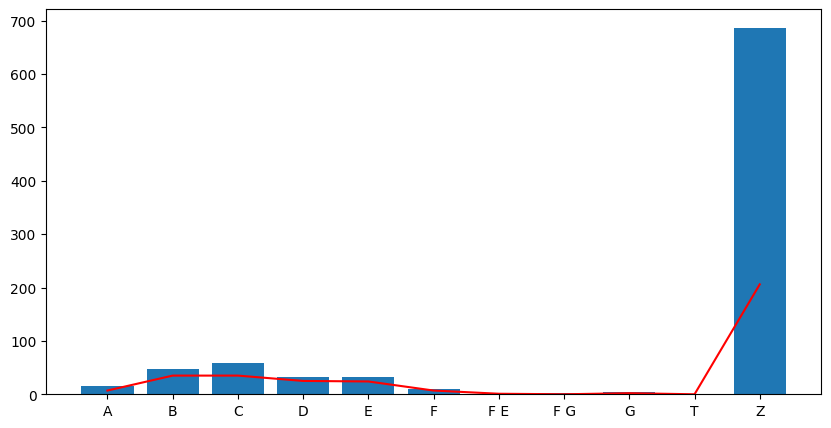

In [1020]:
# Generamos una gráfica para ver la relación entre Cabin L y Survived
cabin_L_sum = t_train.groupby("Cabin L", as_index=False).sum()
cabin_L_count = t_train.groupby("Cabin L", as_index=False).count()

fig = plt.figure(figsize = (10, 5))

plt.bar(cabin_L_count["Cabin L"], cabin_L_count["Survived"])
plt.plot(cabin_L_sum["Cabin L"], cabin_L_sum["Survived"], c="red")

fig.show()

No se vé mayor influencia entre la letra de la cabina y la supervivencia del pasajero, salvo para los valores nulos o Z.

In [1021]:
# Generamos dummies en base a la letra de la cabina
cabin_L_dummies = pd.get_dummies(data=t_train["Cabin L"])
    
cabin_L_dummies.rename(columns={"A":"cabin_L_1"}, inplace=True)
cabin_L_dummies.rename(columns={"B":"cabin_L_2"}, inplace=True)
cabin_L_dummies.rename(columns={"C":"cabin_L_3"}, inplace=True)
cabin_L_dummies.rename(columns={"D":"cabin_L_4"}, inplace=True)
cabin_L_dummies.rename(columns={"E":"cabin_L_5"}, inplace=True)
cabin_L_dummies.rename(columns={"F":"cabin_L_6"}, inplace=True)
cabin_L_dummies.rename(columns={"FE":"cabin_L_7"}, inplace=True)
cabin_L_dummies.rename(columns={"FG":"cabin_L_8"}, inplace=True)
cabin_L_dummies.rename(columns={"G":"cabin_L_9"}, inplace=True)
cabin_L_dummies.rename(columns={"T":"cabin_L_10"}, inplace=True)
cabin_L_dummies.rename(columns={"Z":"cabin_L_11"}, inplace=True)

t_train = pd.concat ([t_train,cabin_L_dummies], axis=1)
t_train = t_train.drop(columns="Cabin L")

In [1022]:
# Para simplificar el análisis de Cabin N, utilizaremos bins para transformarlos en una variable categórica y así
# no afectar el resultado dado el valor de 1000 de los nulos.
t_train["Cabin N range"] = pd.cut(x=t_train['Cabin N'], bins=[0, 30, 60, 90, 120, 150, 1001])

In [1023]:
t_train["Cabin N range"] = t_train["Cabin N range"].astype(str)

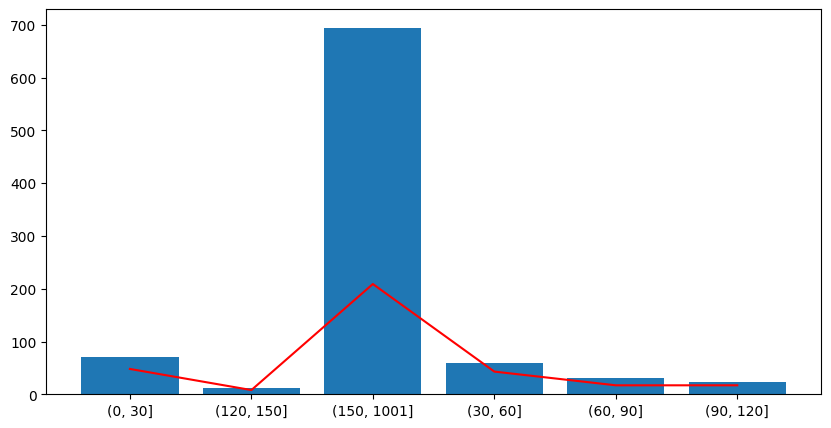

In [1024]:
# Generamos una gráfica para ver la relación entre Cabin N y Survived
cabin_N_sum = t_train.groupby("Cabin N range", as_index=False).sum()
cabin_N_count = t_train.groupby("Cabin N range", as_index=False).count()

fig = plt.figure(figsize = (10, 5))

plt.bar(cabin_N_count["Cabin N range"], cabin_N_count["Survived"])
plt.plot(cabin_N_sum["Cabin N range"], cabin_N_sum["Survived"], c="red")

fig.show()

No se vé mayor influencia entre el número de la cabina y la supervivencia del pasajero, salvo para los valores nulos o Z.

In [1025]:
## Transformamos Cabin N a dummies para incorporarlos al dataset.

cabin_N_dummies = pd.get_dummies(data=t_train["Cabin N range"])

x = 1
for column in cabin_N_dummies.columns:
    cabin_N_dummies.rename(columns={column:"cabin_N_"+str(x)}, inplace=True)
    x += 1
    
t_train = pd.concat ([t_train,cabin_N_dummies], axis=1)
t_train = t_train.drop(columns="Cabin N range")

### Variable Fare

In [1026]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


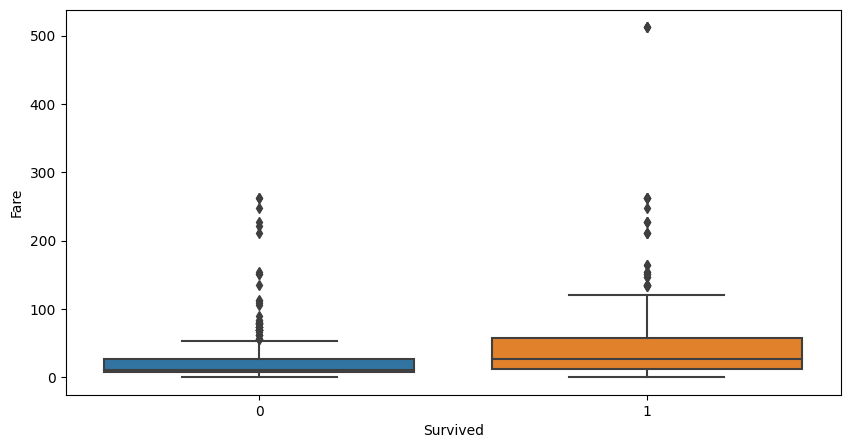

In [1027]:
# Generamos un boxplot para ver si hay outliers

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

sns.boxplot(data=train, x="Survived", y="Fare")

fig.show()

Observamos que efectivamente hay outliers y que, en promedio, se salvan los pasajeros que tienen mayor Fare.

In [1028]:
t_train[t_train["Fare"]>300]

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,F G,cabin_L_9,cabin_L_10,cabin_L_11,cabin_N_1,cabin_N_2,cabin_N_3,cabin_N_4,cabin_N_5,cabin_N_6
258,259,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,Z,...,0,0,0,1,0,0,1,0,0,0
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,512.3292,B51 B53 B55,...,0,0,0,0,0,0,0,1,0,0
737,738,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,512.3292,B101,...,0,0,0,0,0,0,0,0,0,1


Contamos con 3 outliers para variable Fare, por lo que omitiremos estas del modelo.

In [1029]:
# Eliminamos las 3 filas con outliers en "Fare".
for i in range(len(t_train)):
    if t_train["Fare"][i]>300:
        t_train["Fare"][i] = None

t_train.dropna(subset="Fare", inplace=True)

### Variable PassagerId

In [1030]:
# Revisamos si existen datos duplicados en la variable PassagerId. De ser así, hay que eliminarlos.
print("El número total de PassagerId únicos es: ",t_train.drop_duplicates(subset="PassengerId")["PassengerId"].count())
print("El número total de PassagerId original es: ",t_train["PassengerId"].count())

El número total de PassagerId únicos es:  888
El número total de PassagerId original es:  888


No existen pasajeros duplicados

### Variable Ticket

In [1031]:
# Observamos la variable ticket
t_train["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 888, dtype: object

In [1032]:
# Realizamos un split en 2 de la variable Ticket para que la columna "Ticket C", se encuentre el código del ticket y
# en la columna "Ticket N", se encuentre el número del Ticket. Hay casos en los que el Ticket, se compone de 3 elementos. Para
# el caso, concatenamos el 2do elemento al primero ya que visualizamos que se componía de una mala ingesta de datos para el 
# código.
t_train.reset_index(inplace=True, drop=True)
t_train["Ticket C"] = None
t_train["Ticket N"] = None
count=0
term_3 = []
for i in range(len(t_train)):
    ticket_elements = t_train["Ticket"][i].split(" ")
    
    if len(ticket_elements) == 2:
        code = ticket_elements[0]
        number = ticket_elements[1]
    elif len(ticket_elements) == 1:
        code = None
        number = ticket_elements[0]
    elif len(ticket_elements) > 2:
        code = ticket_elements[0]+ ticket_elements[1]
        number = ticket_elements[2]
    else:
        term_3.append(t_train.PassengerId[i])
    t_train["Ticket C"][i] = code
    t_train["Ticket N"][i] = number

In [1033]:
# Revisamos que no hay tickets con 3 elementos.
t_train[t_train['PassengerId'].isin(term_3)]["Ticket"]

Series([], Name: Ticket, dtype: object)

In [1034]:
# Revisamos la variable ticket nuevamente.
t_train['Ticket C'] = t_train['Ticket C'].str.replace('\W', '', regex=True)
t_train["Ticket C"].drop_duplicates()

0             A5
1             PC
2         STONO2
3           None
10            PP
33            CA
43       SCParis
45          SCA4
51            A4
67            SP
72           SOC
86            WC
87       SOTONOQ
92           WEP
127            C
135      SCPARIS
150          SOP
154           Fa
211          FCC
226         SWPP
239         SCOW
307          PPP
388           SC
431         SCAH
463           AS
472    SCAHBasle
647         SOPP
670           FC
758      SOTONO2
880      CASOTON
Name: Ticket C, dtype: object

Encontramos tickets con múltiples códigos, por ejemplo "S0T0N02" Y "SOTON0Q", los cuales se deberían dividir en "S0T0N", "02" Y "0Q". Para el caso no trabajaremos esta data dado el esfuerzo que puede conllevar modificarla.

In [1035]:
# Agregamos el término "Code" a los tickets para que no se confundan con embarked en el modelo.
t_train["Ticket C"] = "Code "+t_train["Ticket C"]

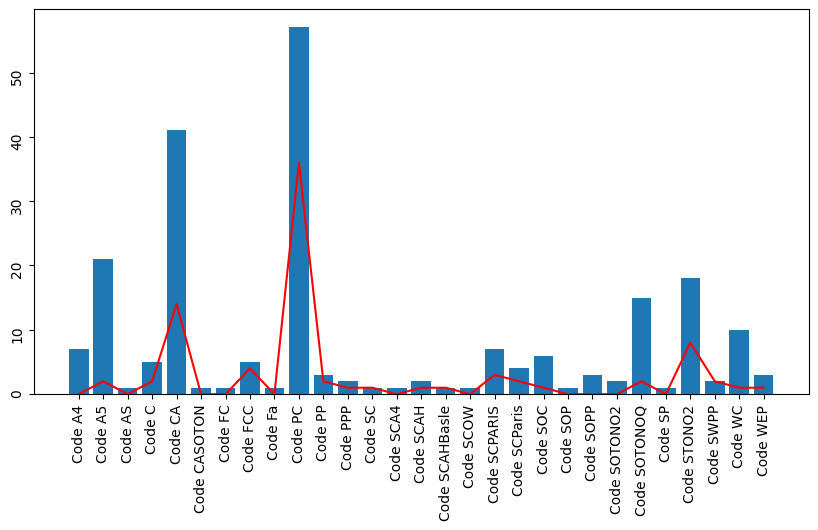

In [1036]:
# Visualizamos la relación entre "Code L" y "Survived"
code_sum = t_train.groupby("Ticket C", as_index=False).sum()
code_count = t_train.groupby("Ticket C", as_index=False).count()

fig = plt.figure(figsize = (10, 5))

plt.tick_params(labelrotation=90)
plt.bar(code_count["Ticket C"], code_count["Survived"])
plt.plot(code_sum["Ticket C"], code_sum["Survived"], color="red")

fig.show()

De momento no podemos ver mayor relación entre el código y la supervivencia del individuo.

In [1037]:
# Transfomramos "Ticket C" a dummies para incorporarlo en el modelo.
ticket_code_dummies = pd.get_dummies(t_train["Ticket C"])

t_train = pd.concat([t_train,ticket_code_dummies], axis=1)

### Age

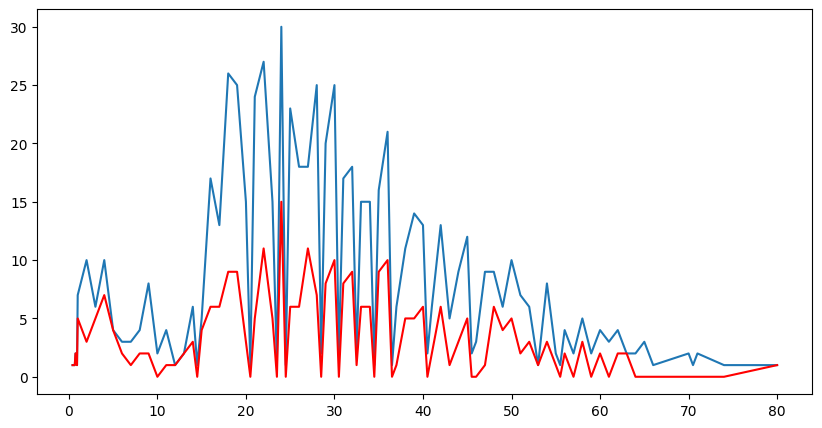

In [1038]:
# Visualizamos la relación entre "Age" y "Survived"
age_sum = t_train.groupby("Age", as_index=False).sum()
age_count = t_train.groupby("Age", as_index=False).count()

fig = plt.figure(figsize = (10, 5))

plt.plot(age_count["Age"], age_count["Survived"])
plt.plot(age_sum["Age"], age_sum["Survived"], c="red")

fig.show()

Proporcionalmente. Desde los 15 hasta los 55 años, sobrevivieron menos individuos. En cierto grado hay relación, lo revisaremos en la tabla de correlaciones.

### Exploración

In [1039]:
# Analizamos la correlación de cada Cabin N con la supervivencia.

cabin_train_corr = t_train.corr()

cabin_train_corr["Survived"].sort_values(ascending=False).head(15)

Survived     1.000000
class_1      0.280580
Fare         0.261742
cabin_N_1    0.183026
cabin_N_4    0.181272
cabin_L_2    0.167201
C            0.160969
cabin_L_4    0.151978
cabin_L_5    0.146555
Code PC      0.134677
cabin_L_3    0.116121
cabin_N_6    0.105358
class_2      0.095834
cabin_L_6    0.082484
Parch        0.082157
Name: Survived, dtype: float64

In [1040]:
cabin_train_corr["Survived"].sort_values().head(15)

Sex            -0.545899
Cabin N        -0.320284
cabin_N_3      -0.319417
class_3        -0.319093
cabin_L_11     -0.314549
S              -0.149815
Code A5        -0.091787
Age            -0.079472
Code A4        -0.070045
Code SOTONOQ   -0.067028
Code WC        -0.061895
Code SOPP      -0.045751
F G            -0.045751
Code SOTONO2   -0.037335
Code SOC       -0.036516
Name: Survived, dtype: float64

* Survived está medianamente correlacionada de forma positiva con: female
* Survived está moderadamente correlacionada de forma positiva con: class_1, Fare, cabin_N_2, cabin_N_1, cabin_L_2, C, cabin_L_4, cabin_L_5, cabin_L_3, cabin_N_4, PC.
* Survived está poco o nada correlacionada con: class_2, cabin_L_6, Parch, cabin_N_3, cabin_N_5, cabin_L_7, cabin_L_1, cabin_L_9, Q, PassengerId, cabin_L_10, SibSp, cabin_L_8, Age.
* Survived está moderadamente correlacionada de forma negativa con: S, cabin_L_11, cabin_N_6, class_3, Cabin N
* Survived está medianamente correlacionada de forma negativa con: male

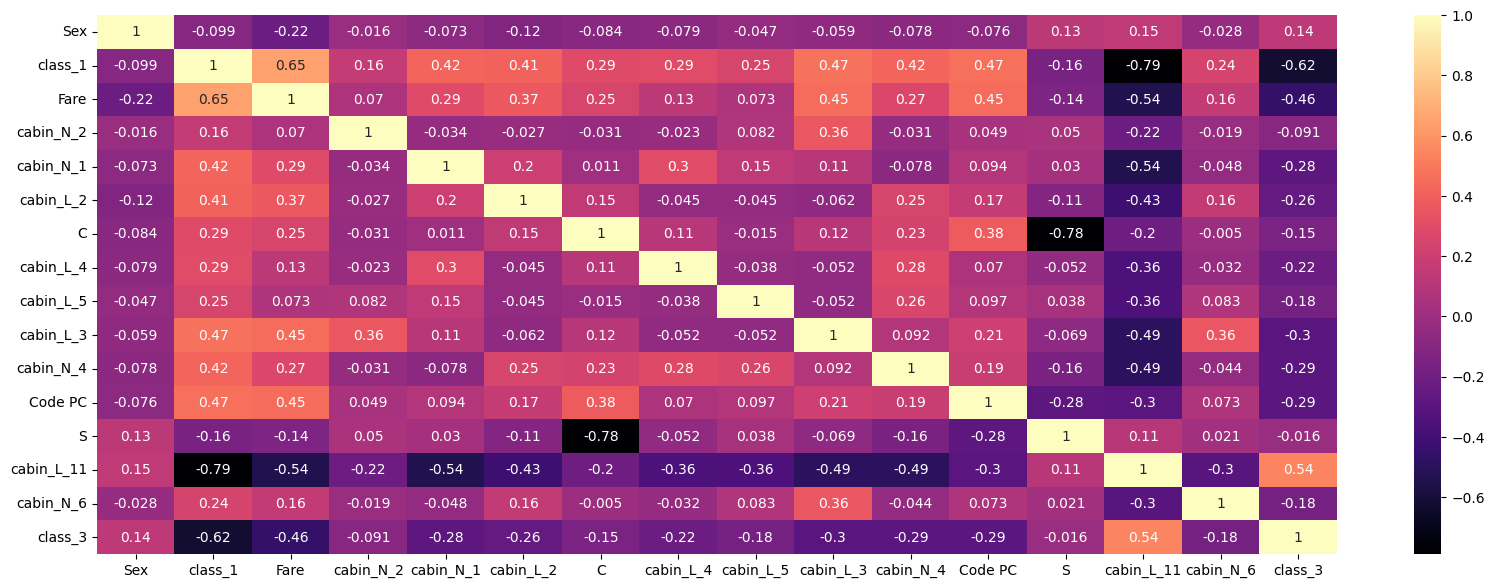

In [1041]:
# Analizamos la correlación entre las variables con correlación significativa.

cabin_train_corr = t_train.filter(["Sex", "class_1", "Fare", "cabin_N_2", "cabin_N_1", "cabin_L_2", "C", "cabin_L_4",
                                   "cabin_L_5", "cabin_L_3", "cabin_N_4", "Code PC", "S", "cabin_L_11", "cabin_N_6", "class_3",
                                   "Cabin" "N", "male"]).corr()

fig, ax = plt.subplots(figsize=(20,7)) 

color_map = sns.color_palette("magma", as_cmap=True)
sns.heatmap(cabin_train_corr, cmap=color_map, annot=True)

fig.show()

In [1042]:
high_corr = []
med_corr = []
low_corr = []
no_corr = []
for column in cabin_train_corr.columns:
    for i in range(len(cabin_train_corr)):
        if (cabin_train_corr[column][i]>=0.7 or cabin_train_corr[column][i]<=(-0.85)) and column != cabin_train_corr.index[i] and str(cabin_train_corr.index[i]+"-"+column) not in high_corr:
            high_corr.append(str(column+"-"+cabin_train_corr.index[i]))
        elif (cabin_train_corr[column][i]>=0.5 or cabin_train_corr[column][i]<=(-0.5)) and column != cabin_train_corr.index[i] and str(cabin_train_corr.index[i]+"-"+column) not in med_corr:
            med_corr.append(str(column+"-"+cabin_train_corr.index[i]))
        elif (cabin_train_corr[column][i]>=0.2 or cabin_train_corr[column][i]<=(-0.2)) and column != cabin_train_corr.index[i] and str(cabin_train_corr.index[i]+"-"+column) not in low_corr:
            low_corr.append(str(column+"-"+cabin_train_corr.index[i]))
        else:
            no_corr.append(str(column+"-"+cabin_train_corr.index[i]))

In [1043]:
high_corr

[]

No existen correlaciones altas entre las variables del modelo, por lo que podemos proseguir con el modelamiento

# Modelamiento

In [1044]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [1045]:
t_train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Code SOC,Code SOP,Code SOPP,Code SOTONO2,Code SOTONOQ,Code SP,Code STONO2,Code SWPP,Code WC,Code WEP
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Z,...,0,0,0,0,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Z,...,0,0,0,0,0,0,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Z,...,0,0,0,0,0,0,0,0,0,0


In [1046]:
# Asignamos los features a las variables X e y.
X = t_train.filter(["Sex", "Fare", "class_1", "class_3", "cabin_N_1", "cabin_N_2", "cabin_N_4", "cabin_N_6", "cabin_L_2",
                    "cabin_L_3", "cabin_L_4", "cabin_L_5", "cabin_L_11", "S", "C", "Code PC"])
y = t_train.filter(["Survived"])

In [1047]:
# Realizamos un split con tamaño de entrenamiento de 80% del conjunto total. Utilizamos random_state=43 para
# evaluar mejor el modelo y realizar cambios en los hiperparámetros de ser necesario. No es necesario contar con un conjunto
# de testeo dado que tenemos una base de datos de test.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=43)

In [1048]:
# Generamos el random forest.
clf = RandomForestClassifier(n_estimators=500, random_state=26
                             ,max_depth=7, class_weight='balanced', max_samples=570)
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, max_samples=570,
                       n_estimators=500, random_state=26)

In [1049]:
# Evaluamos el modelo en base al conjunto de validación e iteramos sobre los hiperparámetros.
y_pred=clf.predict(X_val)
print("La accuracy es del ",metrics.accuracy_score(y_val,y_pred))
print("La precision es del ",precision_score(y_val, y_pred, average="weighted"))
print("El recall es del ", recall_score(y_val, y_pred, average="weighted"))

La accuracy es del  0.8764044943820225
La precision es del  0.8757345243910949
El recall es del  0.8764044943820225


In [1050]:
# Evaluamos el modelo en base al conjunto de entrenamiento
y_pred=clf.predict(X_train)

print("La accuracy es del ",metrics.accuracy_score(y_train,y_pred))
print("La precision es del ",precision_score(y_train, y_pred, average="weighted"))
print("El recall es del ", recall_score(y_train, y_pred, average="weighted"))

La accuracy es del  0.8774647887323944
La precision es del  0.8768839076150411
El recall es del  0.8774647887323944


In [1051]:
y_pred=clf.predict(X_val)

0.5 257.44 Predicted label


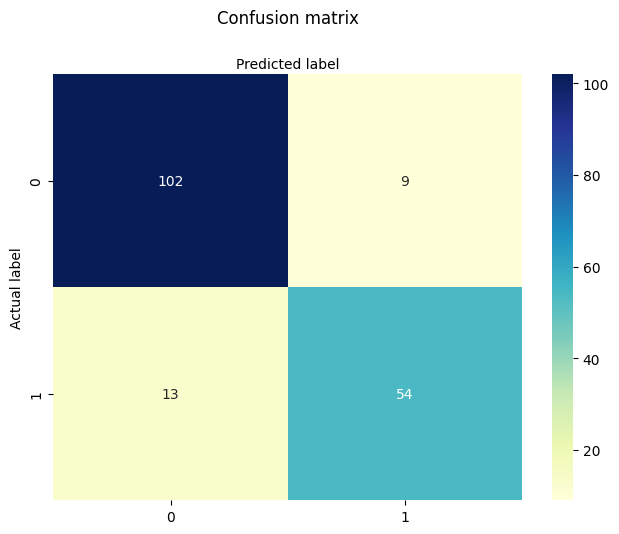

In [1052]:
# Generamos una matriz de confusión para ver si la predicción se inclina hacia un lado.
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(0.5,257.44,'Predicted label')

No se ve que el modelo se haya cargado hacia alguna categoría, por lo que está bien balanceado. Esto fue gracias a utilizar class_weight='balanced_subsample' como hiperparámetro del modelo. Asimismo, vemos generalmente una correcta categorización de los datos con respecto a la supervivencia del individuo.

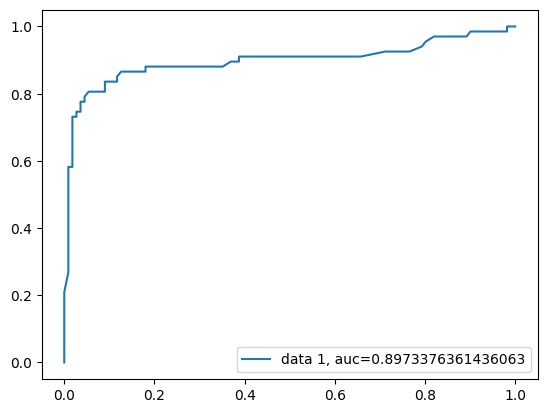

In [1053]:
# Generamos la curva ROC para ver el desempeño del modelo.
y_pred_proba = clf.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Vemos que hay buena predicción en base a la area bajo la curva, la cual nos dá un puntaje de 0.93.

# Aplicación del modelo a nueva data

In [1054]:
test["Sex"] = test['Sex'].replace(['female','male'],[0,1])

In [1055]:
# Transformamos la variable Pclass a dummies para incorporarla al dataset como variable categórica
Pclass_dummies = pd.get_dummies(data=test.Pclass).rename(columns={1:"class_1",2:"class_2",3:"class_3"})
test = pd.concat([test,Pclass_dummies], axis=1)
test = test.drop(columns="Pclass")

In [1056]:
# Transformamos la variable Embarked a dummies y la ingresamos al dataset.
embarked_dummies = pd.get_dummies(data=test.Embarked)
test = pd.concat ([test,embarked_dummies], axis=1)
test = test.drop(columns="Embarked")

In [1057]:
# Rellenamos los t_train None con una categoría Z
test["Cabin"] = test["Cabin"].fillna("Z")

In [1058]:
# Separamos las letras de los números en Cabin para poder visualizar mejor como influyen en la supervivencia del
# individuo.
test["Cabin L"] = None
test["Cabin N"] = None

for i in range(len(test)):
    
    if test["Cabin"][i] != "Z":
        letter = re.split("\d",test["Cabin"][i])
        number = re.split("\D",test["Cabin"][i])
        
        test["Cabin L"][i] = letter[0]
        test["Cabin N"][i] = number[1]
        
test["Cabin N"] = pd.to_numeric(test["Cabin N"])

In [1059]:
test["Cabin L"] = test["Cabin L"].fillna("Z")
test["Cabin N"] = test["Cabin N"].fillna(1000)

In [1060]:
# Generamos dummies en base a la letra de la cabina
cabin_L_dummies = pd.get_dummies(data=test["Cabin L"])
    
cabin_L_dummies.rename(columns={"A":"cabin_L_1"}, inplace=True)
cabin_L_dummies.rename(columns={"B":"cabin_L_2"}, inplace=True)
cabin_L_dummies.rename(columns={"C":"cabin_L_3"}, inplace=True)
cabin_L_dummies.rename(columns={"D":"cabin_L_4"}, inplace=True)
cabin_L_dummies.rename(columns={"E":"cabin_L_5"}, inplace=True)
cabin_L_dummies.rename(columns={"F":"cabin_L_6"}, inplace=True)
cabin_L_dummies.rename(columns={"FE":"cabin_L_7"}, inplace=True)
cabin_L_dummies.rename(columns={"FG":"cabin_L_8"}, inplace=True)
cabin_L_dummies.rename(columns={"G":"cabin_L_9"}, inplace=True)
cabin_L_dummies.rename(columns={"T":"cabin_L_10"}, inplace=True)
cabin_L_dummies.rename(columns={"Z":"cabin_L_11"}, inplace=True)

test = pd.concat ([test,cabin_L_dummies], axis=1)
test = test.drop(columns="Cabin L")

In [1061]:
# Para simplificar el análisis de Cabin N, utilizaremos bins para transformarlos en una variable categórica y así
# no afectar el resultado dado el valor de 1000 de los nulos.
test["Cabin N range"] = pd.cut(x=test['Cabin N'], bins=[0, 30, 60, 90, 120, 150, 1001])

In [1062]:
test["Cabin N range"] = test["Cabin N range"].astype(str)

In [1063]:
## Transformamos Cabin N a dummies para incorporarlos al dataset.

cabin_N_dummies = pd.get_dummies(data=test["Cabin N range"])

x = 1
for column in cabin_N_dummies.columns:
    cabin_N_dummies.rename(columns={column:"cabin_N_"+str(x)}, inplace=True)
    x += 1
    
test = pd.concat ([test,cabin_N_dummies], axis=1)
test = test.drop(columns="Cabin N range")

In [1064]:
# Como en la evaluación nos piden exactamente 418 filas de resultado, transformamos los datos faltantes de "Fare" para que
# no sean "None"
test["Fare"].fillna(value=test["Fare"].mean(), inplace=True)

In [1065]:
# Realizamos un split en 2 de la variable Ticket para que la columna "Ticket C", se encuentre el código del ticket y
# en la columna "Ticket N", se encuentre el número del Ticket. Hay casos en los que el Ticket, se compone de 3 elementos. Para
# el caso, concatenamos el 2do elemento al primero ya que visualizamos que se componía de una mala ingesta de datos para el 
# código.
test.reset_index(inplace=True, drop=True)
test["Ticket C"] = None
test["Ticket N"] = None
count=0
term_3 = []
for i in range(len(test)):
    ticket_elements = test["Ticket"][i].split(" ")
    
    if len(ticket_elements) == 2:
        code = ticket_elements[0]
        number = ticket_elements[1]
    elif len(ticket_elements) == 1:
        code = None
        number = ticket_elements[0]
    elif len(ticket_elements) > 2:
        code = ticket_elements[0]+ ticket_elements[1]
        number = ticket_elements[2]
    else:
        term_3.append(test.PassengerId[i])
    test["Ticket C"][i] = code
    test["Ticket N"][i] = number

In [1066]:
# Revisamos la variable ticket nuevamente.
test['Ticket C'] = test['Ticket C'].str.replace('\W', '', regex=True)

In [1067]:
# Agregamos el término "Code" a los tickets para que no se confundan con embarked en el modelo.
test["Ticket C"] = "Code "+test["Ticket C"]

In [1068]:
# Transfomramos "Ticket C" a dummies para incorporarlo en el modelo.
ticket_code_dummies = pd.get_dummies(test["Ticket C"])

test = pd.concat([test,ticket_code_dummies], axis=1)

In [1075]:
# Predecimos la variable "Supervivencia" del conjunto de testeo.
survived = clf.predict(test.filter(["Sex", "Fare", "class_1", "class_3", "cabin_N_1", "cabin_N_2", "cabin_N_4", "cabin_N_6", "cabin_L_2",
                    "cabin_L_3", "cabin_L_4", "cabin_L_5", "cabin_L_11", "S", "C", "Code PC"]))

In [1102]:
# Creamos un nuevo dataframe para la información de salida.
output = pd.DataFrame(index=test.PassengerId)
output["Survived"] = survived

In [1103]:
output

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [1106]:
# Exportamos el dataframe a csv para subirlo a kaggle.
output.to_csv('output.csv')